In [1]:
import keras

In [2]:
pip install twilio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 8.2 MB/s 


In [3]:
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,rotation_range=180,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,rotation_range=180,zoom_range=0.2,horizontal_flip=True)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
x_train=train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Dataset/train_set.csv',
                                          target_size=(64,64),
                                          batch_size=32,
                                          class_mode='binary')

Found 436 images belonging to 2 classes.


In [9]:
x_test=test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Dataset/test_set',
                                        target_size=(64,64),
                                        batch_size=32,
                                        class_mode='binary')

Found 121 images belonging to 2 classes.


In [10]:
#to define the linear Initialisation import sequential
from keras.models import Sequential
#to add layers import Dense
from keras.layers import Dense
#to create Convolutional kernel import convolution2D
from keras.layers import Convolution2D
#import Maxpooling layer 
from keras.layers import MaxPooling2D
#import flatten layer
from keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

In [11]:
model = Sequential()

In [12]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
#add maxpooling layers
model.add(MaxPooling2D(pool_size=(2,2)))
#add faltten layer
model.add(Flatten())

In [13]:
#add hidden layers
model.add(Dense(150,activation='relu'))
#add output layer
model.add(Dense(1,activation='sigmoid'))

In [14]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])


In [15]:
model.fit_generator(x_train,steps_per_epoch=14,epochs=10,validation_data=x_test,validation_steps=4)


Epoch 1/10
14/14 [==============================] - 190s 13s/step - loss: 1.1190 - accuracy: 0.6307 - val_loss: 0.3060 - val_accuracy: 0.8430
Epoch 2/10
14/14 [==============================] - 22s 2s/step - loss: 0.4094 - accuracy: 0.7982 - val_loss: 0.1540 - val_accuracy: 0.9421
Epoch 3/10
14/14 [==============================] - 23s 2s/step - loss: 0.2606 - accuracy: 0.8739 - val_loss: 0.1127 - val_accuracy: 0.9587
Epoch 4/10
14/14 [==============================] - 21s 1s/step - loss: 0.2185 - accuracy: 0.9060 - val_loss: 0.1133 - val_accuracy: 0.9504
Epoch 5/10
14/14 [==============================] - 21s 2s/step - loss: 0.1804 - accuracy: 0.9358 - val_loss: 0.0916 - val_accuracy: 0.9752
Epoch 6/10
14/14 [==============================] - 23s 2s/step - loss: 0.1956 - accuracy: 0.9174 - val_loss: 0.0873 - val_accuracy: 0.9835
Epoch 7/10
14/14 [==============================] - 22s 2s/step - loss: 0.1726 - accuracy: 0.9289 - val_loss: 0.0790 - val_accuracy: 0.9752
Epoch 8/10
14/14 [

In [16]:
model.save("forest1.h5")

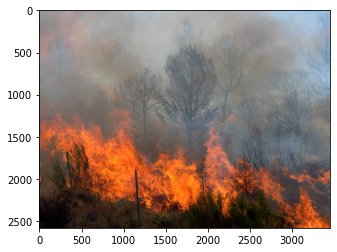

In [17]:
#import load model from keras.model
from keras.models import load_model
#import image from keras
from tensorflow.keras.preprocessing import image
import numpy as np
#import cv2
import cv2
#load the saved model
model=load_model("/content/forest1.h5")
img=image.load_img('/content/drive/MyDrive/Dataset/Dataset/test_set/with fire/climate_change_forest_fire.jpeg')
plt.imshow(img)
plt.show()
x=image.img_to_array(img)
res=cv2.resize(x,dsize=(64,64),interpolation=cv2.INTER_CUBIC)
#expand the image shape
x=np.expand_dims(res,axis=0)

In [18]:
pred=model.predict(x)
pred = int(pred[0][0])
pred
int(pred)

1/1 [==============================] - 0s 113ms/step


1

In [19]:
if pred==0:
  print('NO Forest fire')
  
elif pred==1:
  print('Forest fire')
  from twilio.rest import Client
  print('Forest fire')
  account_sid='AC1e0eeaacf2a58784ba38785635d8a417'
  auth_token='8ca74c53451db9cbc992b366efd9b1ec'
  client=Client(account_sid,auth_token)
  message=client.messages \
  .create(
      body='forest fire is detected,stay alert',
      #use twilio free number
      from_='+15095194905',
      #to number
      to='+919444259067')
  print(message.sid)
  print("Fire detected")
  print("SMS Sent!")

Forest fire
Forest fire
SM0ab71b11602cc6bb4ce29b7e39f03338
Fire detected
SMS Sent!
